# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import os
import json
pd.set_option('display.max_colwidth', 150)

In [2]:
df_1 = pd.read_csv('twitter-archive-enhanced.csv')
df_1.head(6)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https:/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [4]:
with open(os.path.join(folder_name,url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)

In [5]:
os.listdir(folder_name)

['image-predictions.tsv']

In [6]:
df_2 = pd.read_csv('image-predictions.tsv', sep= '\t')

In [7]:
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [8]:
# Reading json file line by line, converting it into python form, then appending it to tweets to form a list 
# of dictionaries
tweets = []

with open('tweet-json.txt') as file:
    # for each line in the file we read the line
    for line in file:
        tweets.append(json.loads(line))

In [9]:
# Create a dataframe from tweets list of dictionaries and saving it as a dataframe with the name tweets_df

tweets_df = pd.DataFrame(tweets, columns = ['id', 'retweet_count', 'favorite_count'])

In [10]:
tweets_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [11]:
# Visual Assessment and Programmatic Assessment
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [12]:
df_1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1709,680609293079592961,NaN,NaN,2015-12-26 04:41:15 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Brody. That is his chair. He loves his chair. Never leaves it. 9/10 might be stuck actually https://t.co/WvJRg0XJit,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680609293079592961/photo/1,9,10,Brody,None,None,None,None
1610,685532292383666176,NaN,NaN,2016-01-08 18:43:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","For the last time, WE. DO. NOT. RATE. BULBASAUR. We only rate dogs. Please only send dogs. Thank you ...9/10 https://t.co/GboDG8WhJG",NaN,NaN,NaN,https://twitter.com/dog_rates/status/685532292383666176/photo/1,9,10,None,None,None,None,None
1645,683849932751646720,NaN,NaN,2016-01-04 03:18:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jiminy. He's not the brightest dog. Needs to lay off the kibble. 5/10 still petable https://t.co/omln4LOy1x,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683849932751646720/photo/1,5,10,Jiminy,None,None,None,None
2065,671151324042559489,NaN,NaN,2015-11-30 02:18:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",*struggling to breathe properly* 12/10 https://t.co/NKHx0pcOii,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671151324042559489/photo/1,12,10,None,None,None,None,None
708,785264754247995392,NaN,NaN,2016-10-09 23:44:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Doc. He requested to be carried around like that. 12/10 anything for Doc https://t.co/mWYACm4qnx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785264754247995392/photo/1,12,10,Doc,None,None,None,None


In [13]:
df_2.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1635,806219024703037440,https://pbs.twimg.com/media/CzBD7MWVIAA5ptx.jpg,1,chow,0.835102,True,Pomeranian,0.040783,True,Eskimo_dog,0.021274,True
1182,738402415918125056,https://pbs.twimg.com/media/Cj9VEs_XAAAlTai.jpg,1,cocker_spaniel,0.346695,True,Blenheim_spaniel,0.193905,True,Chihuahua,0.078000,True
558,677698403548192770,https://pbs.twimg.com/media/CWerGmOXAAAm6NY.jpg,1,Shih-Tzu,0.916645,True,Lhasa,0.057883,True,Pekinese,0.020126,True
1377,763837565564780549,https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg,1,malamute,0.375098,True,jean,0.069362,False,keeshond,0.050528,True
1336,758355060040593408,https://pbs.twimg.com/media/CoY324eWYAEiDOG.jpg,1,Pembroke,0.987643,True,Cardigan,0.012112,True,Siamese_cat,0.000117,False


In [14]:
tweets_df.sample(5)

,id,retweet_count,favorite_count
2034,671729906628341761,4795,9119
391,826115272272650244,3599,17299
1349,704054845121142784,1028,3201
745,780074436359819264,5815,13723
1451,695629776980148225,2377,5020


In [15]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [18]:
df_1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [19]:
df_2.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [20]:
tweets_df.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [21]:
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [22]:
df_2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [23]:
df_1.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [24]:
df_1.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [25]:
df_1.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [26]:
df_1.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

### Quality issues

1. `df_1` table: timestamp column is object datatype.


2. `df_1` table: Retweeted rows in `df1`


3. `df_1` table: a lot of missing values in **in_reply_to_status_id**, **in_reply_to_user_id**, **retweeted_status_id**, **retweeted_status_user_id** and **retweeted_status_timestamp columns** 


4. `df_1` table: name column contains unconventional names like 'None', 'a', 'the', 'such', 'very', 'not', 'an' etc


5. `df_2` table: tweet_id columns are all three tables are in integer datatypes instead of object


6. `df_2` table: underscore and inconsistently capitalized predicted breed names in **p1**, **p2** and **p3** columns


7. `df_1` table: denominator values on which ratings are based on invalid sometimes.


8. `df_1` table: rating numerator not extracted correctly


9. `df_1` table: `df_1` table contains certain inrelevant characters **href=**, **</a**, **>** and should be categorical datatype

### Tidiness issues
1. `df_1` table: timestamp column contains both date and time.


2. all tables contain a common variable **tweet_id**



3. `df_1`: dog stages divided into individual seperate columns 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [27]:
# Make copies of original pieces of data
df1_clean = df_1.copy()
df2_clean = df_2.copy()
tweets_df_clean = tweets_df.copy()

### Issue #1: timestamp column contains both date and time in `df_1` table.

#### Define
- Extract both time and date from timestamp using string slicing
- Split both time and date using split method and assigned them to columns 'date and 'time'

#### Code

In [28]:
# slice only date and time from timestamp column, split and assign them to two new columns 'date' and 'time' respectively
df1_clean.timestamp = df1_clean.timestamp.str.slice(0, 16)
df1_clean[['date', 'time']] = df1_clean.timestamp.str.split(' ', expand = True)

In [29]:
# drop the timestamp column as it isn't anymore useful
df1_clean = df1_clean.drop('timestamp', axis = 1)

#### Test

In [30]:
df1_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,2017-08-01,16:23
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,2017-08-01,00:17
2,891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,2017-07-31,00:18
3,891689557279858688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,2017-07-30,15:58
4,891327558926688256,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,2017-07-29,16:00


### Issue #2: timestamp column is object datatype  in `df_1` table

Note: Timestamp column should be converted to timestamp datatype but has been replaced by two columns 'date' and 'time' column, so these columns will be converted in its place.

#### Define

 - Convert time and date datatype from object ot timestamp each

#### Code

In [31]:
df1_clean.date = pd.to_datetime(df1_clean.date).dt.date

In [32]:
df1_clean.time = pd.to_datetime(df1_clean.time, format='%H:%M').dt.time

#### Test

In [33]:
df1_clean.date

0       2017-08-01
1       2017-08-01
2       2017-07-31
3       2017-07-30
4       2017-07-29
           ...    
2351    2015-11-16
2352    2015-11-16
2353    2015-11-15
2354    2015-11-15
2355    2015-11-15
Name: date, Length: 2356, dtype: object

In [34]:
df1_clean.time

0       16:23:00
1       00:17:00
2       00:18:00
3       15:58:00
4       16:00:00
          ...   
2351    00:24:00
2352    00:04:00
2353    23:21:00
2354    23:05:00
2355    22:32:00
Name: time, Length: 2356, dtype: object

### Issue #3:  Retweeted column in `df_1` table.

#### Define 
 - Drop all values in the retweet column

#### Code

In [35]:
# drop all rows in retweet column where values exist
df1_clean.drop(df_1.index[df_1['retweeted_status_id'].notnull() == True] , inplace = True)

#### Test

In [36]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   source                      2175 non-null   object 
 4   text                        2175 non-null   object 
 5   retweeted_status_id         0 non-null      float64
 6   retweeted_status_user_id    0 non-null      float64
 7   retweeted_status_timestamp  0 non-null      object 
 8   expanded_urls               2117 non-null   object 
 9   rating_numerator            2175 non-null   int64  
 10  rating_denominator          2175 non-null   int64  
 11  name                        2175 non-null   object 
 12  doggo                       2175 non-null   object 
 13  floofer                     2175 

### Issue #4: Missing values in certain columns in `df_1` table .

#### Define 
 - Import the drop() function and remove all columns with lots of missing records

#### Code

In [37]:
df1_clean.drop(columns=['in_reply_to_status_id',
                         'in_reply_to_user_id', 
                         'retweeted_status_id',
                         'retweeted_status_user_id',
                         'retweeted_status_timestamp'],
                axis = 1, inplace = True)

#### Test

In [38]:
df1_clean.head(1)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,2017-08-01,16:23:00


### Issue #5: name column in `df_1` table contains unconventional names like ('None', 'a', 'the', 'such', 'very', 'not', 'an', 'quite' etc)

#### Define
- Use replace function to replace all unfamiliar people names in the name column within df_1 table

#### Code

In [39]:
# updating names of people using the replace function
df1_clean.name = df1_clean.name.replace('None', 'Norma')
df1_clean.name = df1_clean.name.replace('the', 'Threstine')
df1_clean.name = df1_clean.name.replace('such', 'Shristi')
df1_clean.name = df1_clean.name.replace('not', 'Nollo')
df1_clean.name = df1_clean.name.replace('an', 'Anquissa')
df1_clean.name = df1_clean.name.replace('quite', 'Quincy')
df1_clean.name = df1_clean.name.replace('very', 'Vernice')
df1_clean.name = df1_clean.name.replace('Tyr', 'Tyrell')
df1_clean.name = df1_clean.name.replace('Al', 'Alphonso')
df1_clean.name = df1_clean.name.replace('just', 'Justin')
df1_clean.name = df1_clean.name.replace('my', 'Mycell')
df1_clean.name = df1_clean.name.replace('one', 'Juan')
df1_clean.name = df1_clean.name.replace('his', 'Chris')
df1_clean.name = df1_clean.name.replace('getting', 'Gertrude')
df1_clean.name = df1_clean.name.replace('all', 'Allson')

In [40]:
df1_clean.name = df1_clean.name.replace('a', 'Alex')

#### Test

In [41]:
df1_clean.name.head()

0     Phineas
1       Tilly
2      Archie
3       Darla
4    Franklin
Name: name, dtype: object

### Issue #6: tweet_id columns are all three tables are in integer datatypes

#### Define
- convert all tweet id from all three tables into object datatype

#### Code

In [42]:
# converting all id columns into string using astype
df1_clean.tweet_id = df1_clean.tweet_id.astype(str)
df2_clean.tweet_id = df2_clean.tweet_id.astype(str)
tweets_df_clean.id = tweets_df_clean.id.astype(str)

In [43]:
tweets_df_clean.id.astype(str)

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2349    666049248165822465
2350    666044226329800704
2351    666033412701032449
2352    666029285002620928
2353    666020888022790149
Name: id, Length: 2354, dtype: object

In [44]:
df2_clean.rename(columns={'jpg_url':'image_url',
                          'img_num' : 'image_number', 
                          'p1' : 'prediction1', 
                          'p1_conf' : 'prediction1_conf_level',
                          'p1_dog' : 'dog_breed_determinant1', 
                          'p2' : 'prediction2', 
                          'p2_conf' : 'prediction2_conf_level',
                          'p2_dog' : 'dog_breed_determinant2', 
                          'p3' : 'prediction3',
                          'p3_conf' : 'prediction3_conf_level',
                          'p3_dog': 'dog_breed_determinant3'}, 
                 inplace=True)

#### Test

In [45]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   object
 1   source              2175 non-null   object
 2   text                2175 non-null   object
 3   expanded_urls       2117 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
 11  date                2175 non-null   object
 12  time                2175 non-null   object
dtypes: int64(2), object(11)
memory usage: 237.9+ KB


In [46]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tweet_id                2075 non-null   object 
 1   image_url               2075 non-null   object 
 2   image_number            2075 non-null   int64  
 3   prediction1             2075 non-null   object 
 4   prediction1_conf_level  2075 non-null   float64
 5   dog_breed_determinant1  2075 non-null   bool   
 6   prediction2             2075 non-null   object 
 7   prediction2_conf_level  2075 non-null   float64
 8   dog_breed_determinant2  2075 non-null   bool   
 9   prediction3             2075 non-null   object 
 10  prediction3_conf_level  2075 non-null   float64
 11  dog_breed_determinant3  2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [47]:
tweets_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


### Issue #7: underscore and inconsistently capitalized predicted breed names in **p1**, **p2** and **p3** columns `df_2` table

#### Define

- remove underscores from all predicted bread names
- capitalize all breed names

#### Code

In [48]:
# create a function on to apply on columns
def space_capitalize(char):
    return char.replace("_", " ").capitalize()

In [49]:
# applying 'space_capitalize' function on each specified series with the help of apply function
df2_clean.prediction1 = df2_clean.prediction1.apply(space_capitalize)
df2_clean.prediction2 = df2_clean.prediction2.apply(space_capitalize)
df2_clean.prediction3 = df2_clean.prediction3.apply(space_capitalize)

#### Test

In [50]:
df2_clean.head()

,tweet_id,image_url,image_number,prediction1,prediction1_conf_level,dog_breed_determinant1,prediction2,prediction2_conf_level,dog_breed_determinant2,prediction3,prediction3_conf_level,dog_breed_determinant3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #8: denominator values on which ratings are based invalid sometimes  in df_1 table

#### Define
- filter out all ratings denominator which are not equal to standard rating denominator value(10)
- update all these records to 10

#### Code

In [51]:
# filter out all records not equal to 10 and update their values to 10
df1_clean.rating_denominator = df1_clean[df1_clean.rating_denominator != 10] = 10

#### Test

In [52]:
df1_clean.rating_denominator == 10

0       True
1       True
2       True
3       True
4       True
        ... 
2351    True
2352    True
2353    True
2354    True
2355    True
Name: rating_denominator, Length: 2175, dtype: bool

In [53]:
df1_clean.rating_denominator.value_counts()

10    2175
Name: rating_denominator, dtype: int64

### Issue # 9: rating numerator not extracted correctly in `df_1` table

#### Define
- extract rating_numerator using regular expression and replace the old rating numerator with the new extracted rating
- use startswith and replace to replace ratings that contains unwanted characters like ("." and "/" etc).
- convert ratings numerator to float

#### Code

In [54]:
df1_clean.rating_numerator = df1_clean.text.str.extract('([1-9]*?[.]?\d+?\d?/+)', expand = True)

In [55]:
df1_clean["rating_numerator"].loc[df1_clean['rating_numerator'].str.startswith('.')] = df1_clean["rating_numerator"].str.replace(".", "")

C:\Users\Sadiq Marcelo\AppData\Local\Temp\ipykernel_8980\4138574367.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1_clean["rating_numerator"].loc[df1_clean['rating_numerator'].str.startswith('.')] = df1_clean["rating_numerator"].str.replace(".", "")
C:\Users\Sadiq Marcelo\AppData\Local\Temp\ipykernel_8980\4138574367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_clean["rating_numerator"].loc[df1_clean['rating_numerator'].str.startswith('.')] = df1_clean["rating_numerator"].str.replace(".", "")


In [56]:
df1_clean["rating_numerator"] = df1_clean["rating_numerator"].str.replace('/', "").astype(float)

#### Test

In [57]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   object 
 1   source              2175 non-null   object 
 2   text                2175 non-null   object 
 3   expanded_urls       2117 non-null   object 
 4   rating_numerator    2175 non-null   float64
 5   rating_denominator  2175 non-null   int64  
 6   name                2175 non-null   object 
 7   doggo               2175 non-null   object 
 8   floofer             2175 non-null   object 
 9   pupper              2175 non-null   object 
 10  puppo               2175 non-null   object 
 11  date                2175 non-null   object 
 12  time                2175 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 302.4+ KB


In [58]:
df1_clean[['text', 'rating_numerator']].head()

,text,rating_numerator
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0
1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",13.0
2,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0
3,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0
4,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...",12.0


### Issue #10: dog stages divided into individual seperate columns in df_1 table

#### Define
- replace all 'None' values in each dog stage represented individual column with pandas recognize missing values (np.nan)
- combine all columns by creating lambda expression and applying it on all four columns to combine them into single column with the help of apply function.
- drop all 4 original dog stages columns
- convert the single column into category datatype.

#### Code

In [59]:
# replace all "None" values into missing values np.nana
df1_clean["doggo"].replace('None', np.nan, inplace = True)
df1_clean["floofer"].replace('None', np.nan, inplace = True)
df1_clean["pupper"].replace('None', np.nan, inplace = True)
df1_clean["puppo"].replace('None', np.nan, inplace = True)

In [60]:
# combine all 4 columns using apply and lambda function
df1_clean["dog_stages"] = df1_clean[df1_clean.columns[7:10]].apply(lambda x: ",".join(x.dropna().astype(str)), axis = 1)

In [61]:
# drop original columns
df1_clean = df1_clean.drop(['doggo', 'floofer', 'pupper', "puppo"], axis = 1)

In [62]:
# cast new column into category datatype
df1_clean["dog_stages"] = df1_clean["dog_stages"].astype('category')

#### Test

In [63]:
df1_clean["dog_stages"].value_counts()

                 1855
pupper            224
doggo              76
doggo,pupper       10
floofer             9
doggo,floofer       1
Name: dog_stages, dtype: int64

In [64]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2175 non-null   object  
 1   source              2175 non-null   object  
 2   text                2175 non-null   object  
 3   expanded_urls       2117 non-null   object  
 4   rating_numerator    2175 non-null   float64 
 5   rating_denominator  2175 non-null   int64   
 6   name                2175 non-null   object  
 7   date                2175 non-null   object  
 8   time                2175 non-null   object  
 9   dog_stages          2175 non-null   category
dtypes: category(1), float64(1), int64(1), object(7)
memory usage: 236.8+ KB


### Issue #11: source column in `df_1` table contains certain inrelevant characters **href=**, **</a**, **>** and be should categorical datatype

#### Define
- use string slicing to extract substring from source column
- employ regular expression to extract the source of tweets
- convert the source column to category datatype using astype function

#### Code

In [65]:
df1_clean.source

0       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
3       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
4       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
                                               ...                                        
2351    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2352    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2353    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2354    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2355    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>

In [66]:
# extract portion from the lengthy tweets source using str.slice function 
df1_clean.source = df1_clean.source.str.slice(-30)

# use regular extract tweet source from the rest of the characters extracted by string slicing
df1_clean.source = df1_clean.source.str.extract('([TV].+[^</a>])', expand=True)

In [67]:
df1_clean.source = df1_clean.source.astype('category')

#### Test

In [68]:
df1_clean.source.unique()

['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene', 'TweetDeck']
Categories (4, object): ['TweetDeck', 'Twitter Web Client', 'Twitter for iPhone', 'Vine - Make a Scene']

In [69]:
df1_clean.source.head(4)

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
Name: source, dtype: category
Categories (4, object): ['TweetDeck', 'Twitter Web Client', 'Twitter for iPhone', 'Vine - Make a Scene']

In [70]:
df1_clean.dtypes

tweet_id                object
source                category
text                    object
expanded_urls           object
rating_numerator       float64
rating_denominator       int64
name                    object
date                    object
time                    object
dog_stages            category
dtype: object

In [71]:
df1_clean.sample(5)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,dog_stages
1501,692142790915014657,Twitter for iPhone,These are some pictures of Teddy that further justify his 13/10 rating. Please enjoy https://t.co/tDkJAnQsbQ,"https://twitter.com/dog_rates/status/692142790915014657/photo/1,https://twitter.com/dog_rates/status/692142790915014657/photo/1,https://twitter.co...",13.0,10,Norma,2016-01-27,00:31:00,
1291,708119489313951744,Twitter for iPhone,This is Cooper. He basks in the glory of rebellion. 9/10 probably a preteen https://t.co/kDamUfeIpm,https://twitter.com/dog_rates/status/708119489313951744/photo/1,9.0,10,Cooper,2016-03-11,02:36:00,
44,883838122936631299,Twitter for iPhone,This is Noah. He can't believe someone made this mess. Got the vacuum out for you though. Offered to help clean pup. 12/10 super good boy https://...,https://twitter.com/dog_rates/status/883838122936631299/photo/1,12.0,10,Noah,2017-07-09,00:00:00,
1702,680934982542561280,Twitter for iPhone,Say hello to Sadie. She's a Tortellini Sidewinder. Very jubilant pup. Seems loyal. Leaves on point. 10/10 petable af https://t.co/g2bTu4ayPl,https://twitter.com/dog_rates/status/680934982542561280/photo/1,10.0,10,Sadie,2015-12-27,02:15:00,
642,793210959003287553,Twitter for iPhone,This is Maude. She's the h*ckin happiest wasp you've ever seen. 10/10 would pet with caution https://t.co/etL8FHBrh8,https://twitter.com/dog_rates/status/793210959003287553/photo/1,10.0,10,Maude,2016-10-31,22:00:00,


### Issue #12: all table contain a common column **tweet_id**

#### Define
- change the id name in tweet_df_clean table to match the rest of the tables
- merge all tables using the merge function

#### Code

In [72]:
# rename the column to "tweet_id" to the match all other "tweet_id" columns in other tables
tweets_df_clean.rename(columns={"id": "tweet_id"}, inplace = True)

In [73]:
# merge all tables base on common column "tweet_id" and base on intersertion between id's in all tables
master_df = pd.merge(df1_clean, df2_clean, on = "tweet_id", how = "inner")
master_df = pd.merge(master_df, tweets_df_clean, on = "tweet_id", how = "inner")

#### Test

In [74]:
master_df.sample(5)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,dog_stages,...,prediction1_conf_level,dog_breed_determinant1,prediction2,prediction2_conf_level,dog_breed_determinant2,prediction3,prediction3_conf_level,dog_breed_determinant3,retweet_count,favorite_count
686,754449512966619136,Twitter for iPhone,This is Dex. He can see into your past and future. Mesmerizing af 11/10 https://t.co/0dYI0Cpdge,https://twitter.com/dog_rates/status/754449512966619136/photo/1,11.0,10,Dex,2016-07-16,22:55:00,,...,0.858513,True,Basset,0.076012,True,English foxhound,0.016246,True,846,4147
494,788412144018661376,Twitter for iPhone,This is Dexter. He breaks hearts for a living. 11/10 h*ckin handsome af https://t.co/4DhSsC1W7S,"https://twitter.com/dog_rates/status/788412144018661376/photo/1,https://twitter.com/dog_rates/status/788412144018661376/photo/1",11.0,10,Dexter,2016-10-18,16:11:00,,...,0.805238,True,Labrador retriever,0.113798,True,Brittany spaniel,0.038559,True,5990,16060
1542,674754018082705410,Twitter for iPhone,Just received another perfect photo of dogs and the sunset. 12/10 https://t.co/9YmNcxA2Cc,https://twitter.com/dog_rates/status/674754018082705410/photo/1,12.0,10,Norma,2015-12-10,00:54:00,,...,0.352321,False,Promontory,0.131753,False,Wreck,0.095597,False,488,1456
1049,704499785726889984,Twitter for iPhone,When you wake up from a long nap and have no idea who you are. 12/10 https://t.co/dlF93GLnDc,https://twitter.com/dog_rates/status/704499785726889984/photo/1,12.0,10,Norma,2016-03-01,02:53:00,,...,0.376541,True,Siamese cat,0.098057,False,Labrador retriever,0.085211,True,1124,3212
617,766313316352462849,Twitter for iPhone,This is Oscar. He has legendary eyebrows and he h*ckin knows it. Curly af too. 12/10 would hug passionately https://t.co/xuxZoObmF0,https://twitter.com/dog_rates/status/766313316352462849/photo/1,12.0,10,Oscar,2016-08-18,16:38:00,,...,0.966896,True,Miniature poodle,0.016424,True,Cocker spaniel,0.010227,True,2166,7493


In [75]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   tweet_id                1994 non-null   object  
 1   source                  1994 non-null   category
 2   text                    1994 non-null   object  
 3   expanded_urls           1994 non-null   object  
 4   rating_numerator        1994 non-null   float64 
 5   rating_denominator      1994 non-null   int64   
 6   name                    1994 non-null   object  
 7   date                    1994 non-null   object  
 8   time                    1994 non-null   object  
 9   dog_stages              1994 non-null   category
 10  image_url               1994 non-null   object  
 11  image_number            1994 non-null   int64   
 12  prediction1             1994 non-null   object  
 13  prediction1_conf_level  1994 non-null   float64 
 14  dog_breed_determinant1  

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [76]:
master_df.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [77]:
df = pd.read_csv('twitter_archive_master.csv')

In [78]:
df1 = df.loc[:, ["date", "source", "time", "retweet_count", "favorite_count", "dog_stages","rating_numerator"]]
df1.sample(10)

,date,source,time,retweet_count,favorite_count,dog_stages,rating_numerator
304,2017-01-24,Twitter for iPhone,17:04:00,3123,11755,NaN,12.0
647,2016-08-02,Twitter Web Client,01:44:00,13140,29618,NaN,13.0
1735,2015-11-29,Twitter for iPhone,01:56:00,431,872,NaN,1.0
33,2017-07-12,Twitter for iPhone,00:01:00,16439,68152,NaN,12.0
1947,2015-11-18,Twitter for iPhone,02:25:00,95,250,NaN,8.0
1616,2015-12-05,Twitter for iPhone,22:41:00,400,1134,NaN,11.0
595,2016-08-30,Twitter for iPhone,23:58:00,1626,5749,NaN,11.0
119,2017-05-12,Twitter for iPhone,17:12:00,1195,9094,NaN,14.0
1355,2015-12-28,Twitter for iPhone,02:35:00,2072,4347,NaN,3.0
692,2016-07-13,Twitter for iPhone,23:48:00,2655,8411,NaN,8.0


Analysis 1

In [79]:
# create a new column, extract hours from the time column and assign it to it
df1["hour"] = pd.to_datetime(df.time).dt.hour

In [80]:
# use pandas.cut to group hours into parts_of the day
cutoff = [0, 6, 12, 18, 24 ]
label = ["00:00-05:59", "06:00-11:59", "12:00-17:59", "18:00-23:59"]
df1["parts_of_day"] = pd.cut(df1['hour'], bins = cutoff, labels = label, right = False)

In [81]:
df1.head()

,date,source,time,retweet_count,favorite_count,dog_stages,rating_numerator,hour,parts_of_day
0,2017-08-01,Twitter for iPhone,16:23:00,8853,39467,NaN,13.0,16,12:00-17:59
1,2017-08-01,Twitter for iPhone,00:17:00,6514,33819,NaN,13.0,0,00:00-05:59
2,2017-07-31,Twitter for iPhone,00:18:00,4328,25461,NaN,12.0,0,00:00-05:59
3,2017-07-30,Twitter for iPhone,15:58:00,8964,42908,NaN,13.0,15,12:00-17:59
4,2017-07-29,Twitter for iPhone,16:00:00,9774,41048,NaN,12.0,16,12:00-17:59


In [82]:
# find average likes(twitter interactions) on posts in different parts of the day
parts_of_day = df1.groupby('parts_of_day')['favorite_count'].mean()
parts_of_day

parts_of_day
00:00-05:59     7676.290416
06:00-11:59    38129.666667
12:00-17:59    11483.254945
18:00-23:59     8885.087475
Name: favorite_count, dtype: float64

Analysis 2

In [83]:
# find total likes and retweets(twitter interactiosn) on posts depending on sources emanated from 
df1.groupby('source')[['retweet_count', 'favorite_count']].sum()

,retweet_count,favorite_count
source,,
TweetDeck,28590,63729
Twitter Web Client,73159,170342
Twitter for iPhone,5415157,17504006


Analysis 3

In [84]:
df1.dog_stages.value_counts()

pupper           203
doggo             64
doggo,pupper       9
floofer            7
doggo,floofer      1
Name: dog_stages, dtype: int64

In [85]:
# find average ratings of by dog_stages
df1.groupby('dog_stages').rating_numerator.mean()

dog_stages
doggo            11.906250
doggo,floofer    11.000000
doggo,pupper     11.000000
floofer          12.000000
pupper           10.636798
Name: rating_numerator, dtype: float64

### Insights:
1. Part of the day where @WeRateDogs gain high twitter interactions on their post is from morning to midday (06:00-11:59) on an average

2. Majority of their twitter interactions comes from people using Iphone (i.e. Twitter for iPhone)

3. Puppo's happen to have the highest average ratings

### Visualization

In [86]:
import matplotlib.pyplot as plt

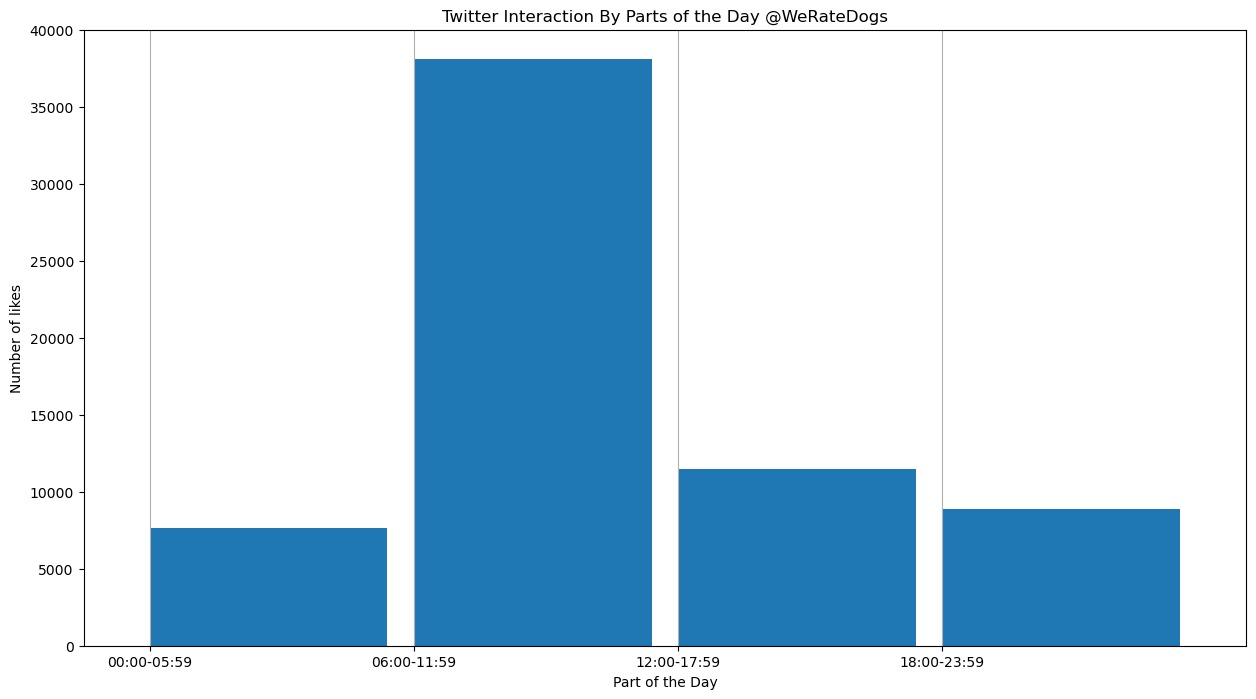

In [87]:
parts_of_day.plot(kind='bar', figsize=(15, 8), width= 0.9, align='edge', rot=0)
plt.ylabel('Number of likes')
plt.xlabel('Part of the Day')
plt.title('Twitter Interaction By Parts of the Day @WeRateDogs')
plt.grid(axis='x')